In [1]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import gmaps


In [2]:
#Get data from CSV file
#Source(s): U.S. Census Bureau, 2014-2018 American Community Survey 5-Year Estimates. Powered by the U.S. Census Bureau
# An 'X' entry indicates that either no sample observations or too few sample observations were available to compute an estimate.

census_cal_race_data = "./Median Household Income by County by Race of Householder.csv"
cal_race_data = pd.read_csv(census_cal_race_data)
cal_race_data.head()

,County,White,Margin Of Error,Black or African American,Margin Of Error.1,American Indian and Alaska Native,Margin Of Error.2,Asian,Margin Of Error.3,Native Hawaiian and Other Pacific Islander,Margin Of Error.4,Some Other Race,Margin Of Error.5,Two or More Races,Margin Of Error.6
0,Alameda County,"$101,942","+/- $1,035","$49,367","+/- $1,733","$63,022","+/- $5,299","$116,200","+/- $1,742","$79,824","+/- $6,577","$70,027","+/- $2,586","$87,650","+/- $4,911"
1,Alpine County,"$69,063","+/- $12,900",$X,X,"$40,417","+/- $25,677",$X,X,$X,X,$X,X,$X,X
2,Amador County,"$60,564","+/- $3,725",$X,X,$X,X,"$72,188","+/- $40,739",$X,X,"$66,680","+/- $38,485","$56,765","+/- $10,324"
3,Butte County,"$49,998","+/- $1,673","$30,094","+/- $8,267","$41,691","+/- $10,341","$41,981","+/- $6,134","$96,630","+/- $29,101","$43,014","+/- $3,763","$38,779","+/- $4,091"
4,Calaveras County,"$59,561","+/- $3,927",$X,X,"$58,452","+/- $35,557","$37,963","+/- $12,889",$X,X,"$41,161","+/- $29,126","$27,307","+/- $17,042"


In [3]:
#Pull neededed fields from the census data set.

county_race_data = cal_race_data.loc[:,["County","White","Black or African American","American Indian and Alaska Native",
                                                      "Asian","Native Hawaiian and Other Pacific Islander","Some Other Race",
                                                      "Two or More Races"]]  
county_race_data = county_race_data.dropna(how='any')

county_race_data.head(100)                                                                          

,County,White,Black or African American,American Indian and Alaska Native,Asian,Native Hawaiian and Other Pacific Islander,Some Other Race,Two or More Races
0,Alameda County,"$101,942","$49,367","$63,022","$116,200","$79,824","$70,027","$87,650"
1,Alpine County,"$69,063",$X,"$40,417",$X,$X,$X,$X
2,Amador County,"$60,564",$X,$X,"$72,188",$X,"$66,680","$56,765"
3,Butte County,"$49,998","$30,094","$41,691","$41,981","$96,630","$43,014","$38,779"
4,Calaveras County,"$59,561",$X,"$58,452","$37,963",$X,"$41,161","$27,307"
5,Colusa County,"$56,696",$X,"$69,167",$X,$X,"$54,211","$63,269"
6,Contra Costa County,"$100,460","$61,768","$73,008","$112,588","$89,818","$62,996","$80,179"
7,Del Norte County,"$47,039","$56,226","$30,500","$80,735",$X,"$32,759","$45,718"
8,El Dorado County,"$80,035","$91,250","$61,250","$122,314","$57,788","$52,938","$73,277"
9,Fresno County,"$54,468","$32,571","$40,022","$61,069","$47,000","$38,685","$49,073"


In [4]:
#Clean the data
#Change $X to $0 in the columns
county_race_data['Black or African American'] = county_race_data['Black or African American'].replace({'$X':'$0'})
county_race_data['American Indian and Alaska Native'] = county_race_data['American Indian and Alaska Native'].replace({'$X':'$0'})
county_race_data['Asian'] = county_race_data['Asian'].replace({'$X':'$0'})
county_race_data['Native Hawaiian and Other Pacific Islander'] = county_race_data['Native Hawaiian and Other Pacific Islander'].replace({'$X':'$0'})
county_race_data['Some Other Race'] = county_race_data['Some Other Race'].replace({'$X':'$0'})
county_race_data['Two or More Races'] = county_race_data['Two or More Races'].replace({'$X':'$0'})

county_race_data

,County,White,Black or African American,American Indian and Alaska Native,Asian,Native Hawaiian and Other Pacific Islander,Some Other Race,Two or More Races
0,Alameda County,"$101,942","$49,367","$63,022","$116,200","$79,824","$70,027","$87,650"
1,Alpine County,"$69,063",$0,"$40,417",$0,$0,$0,$0
2,Amador County,"$60,564",$0,$0,"$72,188",$0,"$66,680","$56,765"
3,Butte County,"$49,998","$30,094","$41,691","$41,981","$96,630","$43,014","$38,779"
4,Calaveras County,"$59,561",$0,"$58,452","$37,963",$0,"$41,161","$27,307"
5,Colusa County,"$56,696",$0,"$69,167",$0,$0,"$54,211","$63,269"
6,Contra Costa County,"$100,460","$61,768","$73,008","$112,588","$89,818","$62,996","$80,179"
7,Del Norte County,"$47,039","$56,226","$30,500","$80,735",$0,"$32,759","$45,718"
8,El Dorado County,"$80,035","$91,250","$61,250","$122,314","$57,788","$52,938","$73,277"
9,Fresno County,"$54,468","$32,571","$40,022","$61,069","$47,000","$38,685","$49,073"


In [5]:
#Get data type of the columns
county_race_data.dtypes

County                                        object
White                                         object
Black or African American                     object
American Indian and Alaska Native             object
Asian                                         object
Native Hawaiian and Other Pacific Islander    object
Some Other Race                               object
Two or More Races                             object
dtype: object

In [6]:
#Clean the data
#Change data type from string to float
county_race_data[county_race_data.columns[1:]] = county_race_data[county_race_data.columns[1:]].replace('[\$,]', '', regex=True).astype(float)
county_race_data.dtypes

County                                         object
White                                         float64
Black or African American                     float64
American Indian and Alaska Native             float64
Asian                                         float64
Native Hawaiian and Other Pacific Islander    float64
Some Other Race                               float64
Two or More Races                             float64
dtype: object

In [7]:
#Clean the data
#Remove the word "County" from the County column
county_race_data['County'] = county_race_data['County'].replace(' County', '', regex=True)
county_race_data.head()

,County,White,Black or African American,American Indian and Alaska Native,Asian,Native Hawaiian and Other Pacific Islander,Some Other Race,Two or More Races
0,Alameda,101942.0,49367.0,63022.0,116200.0,79824.0,70027.0,87650.0
1,Alpine,69063.0,0.0,40417.0,0.0,0.0,0.0,0.0
2,Amador,60564.0,0.0,0.0,72188.0,0.0,66680.0,56765.0
3,Butte,49998.0,30094.0,41691.0,41981.0,96630.0,43014.0,38779.0
4,Calaveras,59561.0,0.0,58452.0,37963.0,0.0,41161.0,27307.0


In [8]:
#Create data for pie chart.  One data frame for race, and one for income
race = ["White","Black or African American","American Indian and Alaska Native","Asian","Native Hawaiian and Other Pacific Islander",
       "Some Other Race","Two or More Races"]

income = [county_race_data['White'].sum(),county_race_data['Black or African American'].sum(),county_race_data['American Indian and Alaska Native'].sum(),
         county_race_data['Asian'].sum(),county_race_data['Native Hawaiian and Other Pacific Islander'].sum(),county_race_data['Some Other Race'].sum(),
         county_race_data['Two or More Races'].sum()]


In [55]:
#Get average median income by race
white_avg_income = county_race_data['White'].sum()/len(county_race_data)
black_avg_income = county_race_data['Black or African American'].sum()/len(county_race_data)
ai_avg_income = county_race_data['American Indian and Alaska Native'].sum()/len(county_race_data)
asian_avg_income = county_race_data['Asian'].sum()/len(county_race_data)
nh_avg_income = county_race_data['Native Hawaiian and Other Pacific Islander'].sum()/len(county_race_data)
sor_avg_income = county_race_data['Some Other Race'].sum()/len(county_race_data)
tom_avg_income =county_race_data['Two or More Races'].sum()/len(county_race_data)
print({white_avg_income},{black_avg_income},{ai_avg_income},{asian_avg_income},
     {nh_avg_income},{sor_avg_income},{tom_avg_income})

{66811.72413793103} {40844.89655172414} {50789.06896551724} {64669.18965517241} {38721.51724137931} {47792.43103448276} {56859.94827586207}


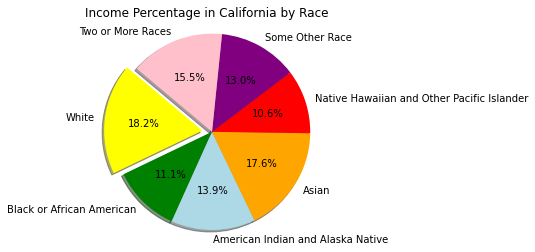

In [9]:
#%matplotlib notebook

# Create 2 arrays that contains the colors and the distance for each slice
colors = ["yellow","green","lightblue","orange","red","purple","pink","yellowgreen","lightskyblue","lightcoral"]
explode = (0.1,0,0,0,0,0,0)

# Tell matplotlib to create a pie chart based upon the above data
plt.pie(income, explode=explode, labels=race, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

# Create axes which are equal so we have a perfect circle
plt.axis("equal")

# Save an image of the pie chart and print the final product to the screen

plt.title("Income Percentage in California by Race")

plt.savefig("MedianIncomeByRacePieChart.png", metadatadict={"Created By":"Fareedah Sabree Pete"})
plt.show()

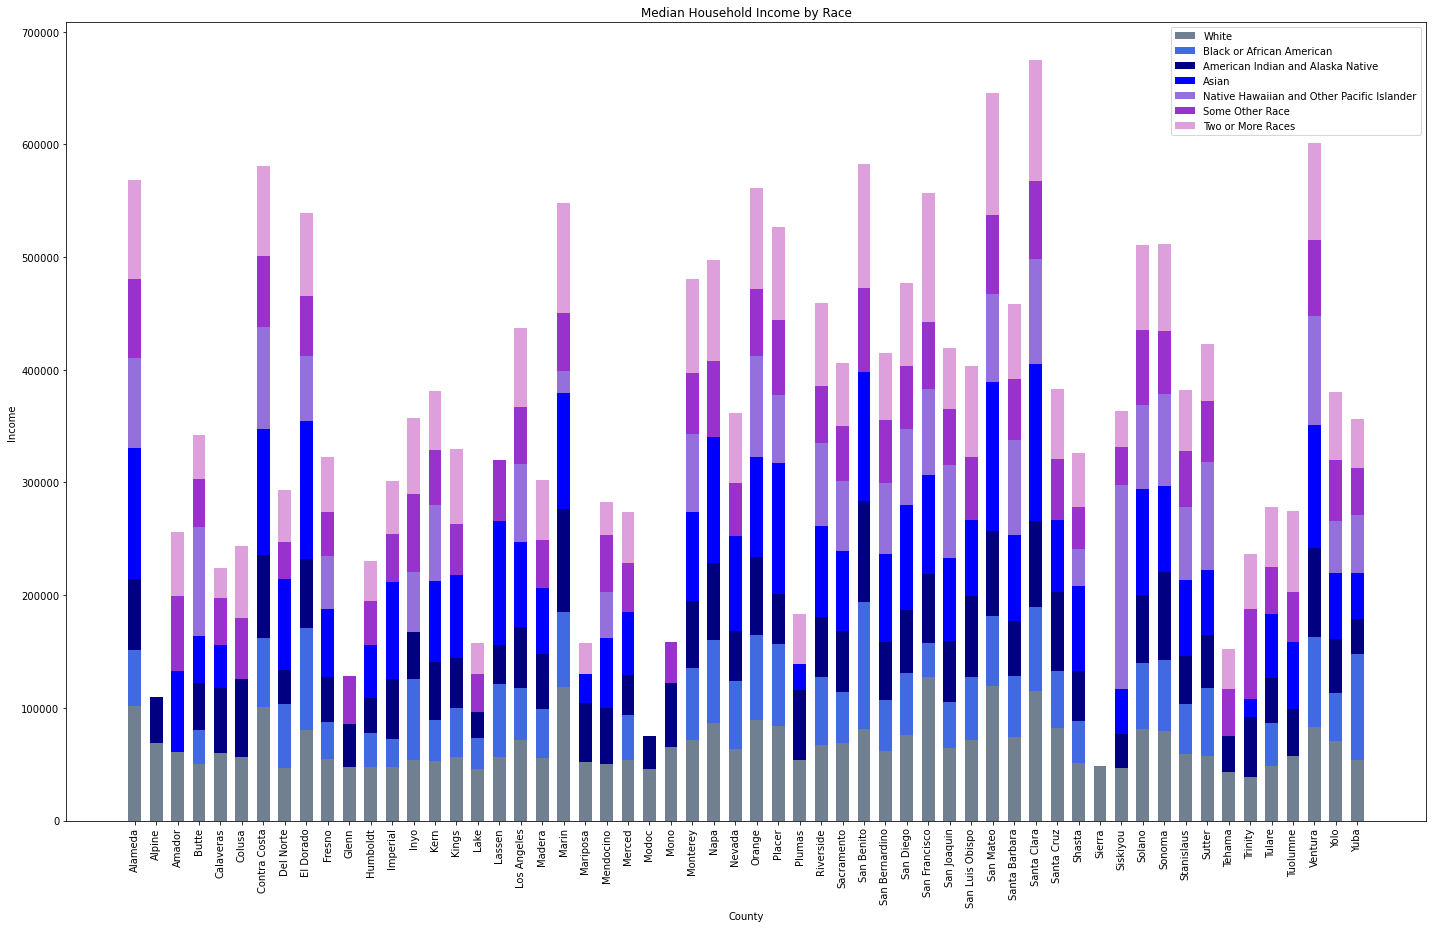

In [10]:
#Create data to build a stacked bar graph

counties = county_race_data['County']

white  = county_race_data['White']
black  = county_race_data['Black or African American']
ai = county_race_data['American Indian and Alaska Native']
asian = county_race_data['Asian']
pi = county_race_data['Native Hawaiian and Other Pacific Islander']
sor = county_race_data['Some Other Race']
crd = county_race_data['Two or More Races']

ind = [county for county in counties]

#Build stacked bar graph
plt.figure(figsize=(20,13))

plt.bar(ind, white, width=0.6, label='White', color='slategray')
plt.bar(ind, black, width=0.6, label='Black or African American', color='royalblue', bottom=white)
plt.bar(ind, ai, width=0.6, label='American Indian and Alaska Native', color='navy', bottom=white+black)
plt.bar(ind, asian, width=0.6, label='Asian', color='blue', bottom= white+black+ai)
plt.bar(ind, pi, width=0.6, label='Native Hawaiian and Other Pacific Islander', color='mediumpurple', bottom= white+black+ai+asian)
plt.bar(ind, sor, width=0.6, label='Some Other Race', color='darkorchid',bottom= white+black+ai+asian+pi)
plt.bar(ind, crd, width=0.6, label='Two or More Races', color='plum',bottom= white+black+ai+asian+pi+sor)
 
#Set x axis values and set to a 90 degree angle, so all counties are represented on the graph    
plt.xticks(ind, counties,rotation=90)

#Set labels
plt.ylabel("Median Household Income")
plt.xlabel(" California County")

#Set location for the legend and title
plt.legend(loc="upper right")
plt.title("Median Household Income by Race")
plt.tight_layout()

#Save graph to file

plt.savefig("MedianIncomeByCountyRaceBarChart.png", metadatadict={"Created By":"Fareedah Sabree Pete"})
plt.show()

In [11]:
#Reset the index to the original table
county_race = county_race_data.set_index('County')
county_race.head()

,White,Black or African American,American Indian and Alaska Native,Asian,Native Hawaiian and Other Pacific Islander,Some Other Race,Two or More Races
County,,,,,,,
Alameda,101942.0,49367.0,63022.0,116200.0,79824.0,70027.0,87650.0
Alpine,69063.0,0.0,40417.0,0.0,0.0,0.0,0.0
Amador,60564.0,0.0,0.0,72188.0,0.0,66680.0,56765.0
Butte,49998.0,30094.0,41691.0,41981.0,96630.0,43014.0,38779.0
Calaveras,59561.0,0.0,58452.0,37963.0,0.0,41161.0,27307.0


In [30]:
#Identifies which race makes the most money by County
race_max = pd.DataFramecounty_race.idxmax()
race_max

White                                         San Francisco
Black or African American                        San Benito
American Indian and Alaska Native                     Marin
Asian                                           Santa Clara
Native Hawaiian and Other Pacific Islander         Siskiyou
Some Other Race                                     Trinity
Two or More Races                             San Francisco
dtype: object

In [31]:
#Identifies which race makes the least money by County.  
#This may be skewed as some counties did not report a median income by race. $X value
race_min =county_race.idxmin()
race_min

White                                         Trinity
Black or African American                      Alpine
American Indian and Alaska Native              Amador
Asian                                          Alpine
Native Hawaiian and Other Pacific Islander     Alpine
Some Other Race                                Alpine
Two or More Races                              Alpine
dtype: object

In [14]:
#Transpose the table to get which race makes the most money by county
county_race_tr = county_race.transpose()
county_race_tr.head()

County,Alameda,Alpine,Amador,Butte,Calaveras,Colusa,Contra Costa,Del Norte,El Dorado,Fresno,...,Sonoma,Stanislaus,Sutter,Tehama,Trinity,Tulare,Tuolumne,Ventura,Yolo,Yuba
White,101942.0,69063.0,60564.0,49998.0,59561.0,56696.0,100460.0,47039.0,80035.0,54468.0,...,79705.0,58745.0,57539.0,43441.0,38575.0,48458.0,57175.0,82815.0,70407.0,53695.0
Black or African American,49367.0,0.0,0.0,30094.0,0.0,0.0,61768.0,56226.0,91250.0,32571.0,...,62656.0,44868.0,59766.0,0.0,0.0,38171.0,0.0,79785.0,42695.0,94070.0
American Indian and Alaska Native,63022.0,40417.0,0.0,41691.0,58452.0,69167.0,73008.0,30500.0,61250.0,40022.0,...,78304.0,42015.0,47625.0,31413.0,53036.0,40278.0,41488.0,79386.0,48056.0,30724.0
Asian,116200.0,0.0,72188.0,41981.0,37963.0,0.0,112588.0,80735.0,122314.0,61069.0,...,76200.0,68149.0,57787.0,0.0,16667.0,56552.0,59583.0,108863.0,58306.0,41400.0
Native Hawaiian and Other Pacific Islander,79824.0,0.0,0.0,96630.0,0.0,0.0,89818.0,0.0,57788.0,47000.0,...,81479.0,64349.0,95573.0,0.0,0.0,0.0,0.0,97039.0,46333.0,51364.0


In [40]:
#Get race that makes the highest income per county
max_county =county_race_tr.idxmax()
max_county.to_frame()
max_county

County
Alameda                                                 Asian
Alpine                                                  White
Amador                                                  Asian
Butte              Native Hawaiian and Other Pacific Islander
Calaveras                                               White
Colusa                      American Indian and Alaska Native
Contra Costa                                            Asian
Del Norte                                               Asian
El Dorado                                               Asian
Fresno                                                  Asian
Glenn                                                   White
Humboldt                                                White
Imperial                                                Asian
Inyo                                Black or African American
Kern                                                    Asian
Kings                                                   Asian
L

In [41]:
#Get the value counts to identify the Race with that has the highest income per county
max_county.value_counts()

Asian                                         29
White                                         15
Native Hawaiian and Other Pacific Islander     6
Two or More Races                              3
Black or African American                      2
American Indian and Alaska Native              2
Some Other Race                                1
dtype: int64

In [36]:
#Get race that makes the least by county
min_county = county_race_tr.idxmin()
min_county.value_counts()

Black or African American                     29
Native Hawaiian and Other Pacific Islander    15
Some Other Race                                7
American Indian and Alaska Native              5
Asian                                          2
dtype: int64

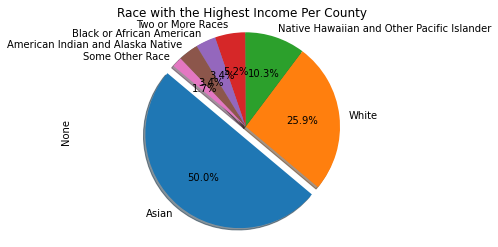

In [51]:
#Plot race percentage per county

explode = (0.1,0,0,0,0,0,0)
plot = max_county.value_counts().plot.pie(autopct="%1.1f%%",explode=explode,subplots = True,shadow=True, startangle=140)



# Create axes which are equal so we have a perfect circle
plt.axis("equal")

# Save an image of the pie chart and print the final product to the screen

plt.title("Race with the Highest Income Per County")

plt.savefig("Race PercentageByCountyPieChart.png", metadatadict={"Created By":"Fareedah Sabree Pete"})
plt.show()